# Feature selection by category or reference paper
This tests all feature sets by classifier

Separating Severity 1 v 2

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score

from sklearn.preprocessing import StandardScaler  

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


In [2]:
data = pd.read_csv("OSA_complete_patients.csv", index_col = 0)
# this data file was created using the RF_no_nan_data.ipynb file which should be in the missing value imputation folder

In [3]:
data.head()

,PatientID,Sex,Age,Current_smoker,Former_smoker,Sedentary,Height,Weight,Cervical_perimeter,Abdominal_perimeter,...,Nocturnal_perspiration,Shortness_of_breath_on_exertion,Nocturia,Drowsiness_accident,Near_miss_accident,Respiratory_arrest,Epworth_scale,Pichots_scale,Depression_scale,Severity
39,23,2.0,57.883641,0.0,0.0,0.0,172.0,90.0,45.0,125.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,4.0,5.0,3
41,24,2.0,60.796715,0.0,0.0,0.0,156.0,85.0,35.0,113.0,...,0.0,1.0,1.0,0.0,0.0,1.0,19.0,17.0,4.0,3
46,28,1.0,63.438741,0.0,0.0,0.0,178.0,68.0,35.0,73.0,...,0.0,0.0,1.0,0.0,0.0,1.0,5.0,3.0,0.0,1
55,32,1.0,28.736482,0.0,0.0,0.0,180.0,69.0,36.0,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0
56,33,1.0,56.802190,0.0,0.0,0.0,185.0,118.0,43.0,106.0,...,0.0,0.0,0.0,0.0,0.0,1.0,12.0,13.0,2.0,3


In [4]:
features = ['Sex', 'Age', 'Current_smoker', 'Former_smoker',
       'Sedentary', 'Height', 'Weight', 'Cervical_perimeter',
       'Abdominal_perimeter', 'Systolic_BP', 'Diastolic_BP',
       'Maxillofacial_profile', 'BMI', 'High_BP', 'Asthma', 'Rhinitis', 'COPD',
       'Respiratory_fail', 'Myocardial_infarct', 'Coronary_fail',
       'Arrhythmias', 'Stroke', 'Heart_fail', 'Arteriopathy', 'Gastric_reflux',
       'Glaucoma', 'Diabetes', 'Hypercholesterolemia', 'Hypertriglyceridemia',
       'Hypo(er)thyroidism', 'Depression', 'Obesity', 'Dysmorphology',
       'Restless_Leg_Syndrome', 'Snoring', 'Diurnal_somnolence',
       'Driving_drowsiness', 'Morning_fatigue', 'Morning_headache',
       'Memory_problem', 'Nocturnal_perspiration',
       'Shortness_of_breath_on_exertion', 'Nocturia', 'Drowsiness_accident',
       'Near_miss_accident', 'Respiratory_arrest', 'Epworth_scale',
       'Pichots_scale', 'Depression_scale']

### Wu et al. [25] 
age; body mass index; Epworth Sleepiness
Scale; waistline; neck circumference; and
difference of blood pressure before going
to sleep and early in the morning

In [5]:
wu = ['Age','BMI','Epworth_scale',  'Abdominal_perimeter', 'Cervical_perimeter','Systolic_BP', 'Diastolic_BP']
# The Wu paper included a feature described as "The difference of blood presure before going to sleep and early in the morning." 
# This dataset did not include that feature, so it is substituted here with disastolic and systolic BP

### Mencar et al. [15]
body mass index; gender; and Epworth
Sleepiness Scale

In [6]:
mencar = ['BMI', 'Sex', 'Epworth_scale']

### Huang et al. [12] 
age; waistline; neck circumference; snoring;
sleep onset latency; and witnessed apnea

In [7]:
huang = ['Age','Cervical_perimeter', 'Snoring']
# The Huang paper included the features: sleep onset latency and witnessed apnea
# This dataset did not included sleep onset latency data, and including results for witnessed apnea would skew the results so it was not included

### Ustun et al. [21] 
age; body mass index; gender; diabetes; hypertension; and tabagism (smoker status)

In [8]:
ustun = ['Age','BMI', 'Sex','Diabetes', 'High_BP', 'Current_smoker', 'Former_smoker']

### Rodruiges Jr et al.
age; nocturia frequency; body mass index;
depression score; neck circumference; hip
measurement; diastolic blood pressure; and
tabagism

In [9]:
rodruiges = ['Age', 'Nocturia', 'BMI', 'Depression_scale', 'Cervical_perimeter', 'Abdominal_perimeter', 'Diastolic_BP', 'Current_smoker', 'Former_smoker' ]

### Categories

In [10]:
demographic = ['Sex','Age','Current_smoker','Former_smoker','Sedentary']

In [11]:
measurements = ['Height','Weight','Cervical_perimeter',
               'Abdominal_perimeter','Systolic_BP','Diastolic_BP','Maxillofacial_profile','BMI','High_BP']

In [12]:
comorbidities = ['Asthma','Rhinitis','COPD','Respiratory_fail','Myocardial_infarct','Coronary_fail','Arrhythmias','Stroke',
                 'Heart_fail','Arteriopathy','Gastric_reflux','Glaucoma','Diabetes','Hypercholesterolemia','Hypertriglyceridemia',
                 'Hypo(er)thyroidism','Depression','Obesity','Dysmorphology','Restless_Leg_Syndrome']

In [13]:
symptoms=['Snoring','Diurnal_somnolence','Driving_drowsiness','Morning_fatigue','Morning_headache','Memory_problem',
          'Nocturnal_perspiration','Shortness_of_breath_on_exertion','Nocturia','Drowsiness_accident','Near_miss_accident',
          'Respiratory_arrest']

In [14]:
questionnaires = ['Epworth_scale','Pichots_scale','Depression_scale']

### Dataframe of only Severity 0 and 1

In [15]:
sev = [1,2]
data_1_2 = data[data['Severity'].isin(sev)]
print(data_1_2.shape)
print(data_1_2['Severity'].value_counts())

(10178, 51)
2    5142
1    5036
Name: Severity, dtype: int64


## Models

##### Note: Feature scaling is essential for machine learning algorithms that calculate distances between data

### Creating dictionary of feature sets

In [16]:
feature_list = {}

feature_list['All']= features
feature_list['Wu'] = wu
feature_list['Mencar'] = mencar
feature_list['Ustun'] = ustun
feature_list['Huang'] = huang
feature_list['Rodruiges'] = rodruiges
feature_list['Demographic'] = demographic
feature_list['Measurements'] = measurements
feature_list['Comorbidities'] = comorbidities
feature_list['Symptoms'] = symptoms
feature_list['Questionnaires'] = questionnaires


### Random Forests

In [17]:
accuracy, precision, recall = {}, {}, {}

for key in feature_list.keys():
    
    # Define X and y test/ train/ split
    X=data_1_2[feature_list[key]]  # Features  
    y=data_1_2['Severity']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
    clf=RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state = 0)  #defining classifier method
    clf.fit(X_train,y_train)                   # training classifier 
    
    # Prediction 
    predictions = clf.predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = balanced_accuracy_score(predictions, y_test) 
    precision[key] = precision_score(predictions, y_test, average='weighted')
    recall[key] = recall_score(predictions, y_test, average='weighted')

In [18]:
df_model = pd.DataFrame(index=feature_list.keys())
df_model['Balanced Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Balanced Accuracy,Precision,Recall
All,0.581196,0.581420,0.581041
Wu,0.552212,0.552459,0.552063
Mencar,0.506935,0.506995,0.506876
Ustun,0.532018,0.532143,0.531925
Huang,0.514688,0.514726,0.514735
Rodruiges,0.543880,0.544195,0.543713
Demographic,0.505115,0.505771,0.504912
Measurements,0.526000,0.526018,0.526031
Comorbidities,0.543935,0.585547,0.538310
Symptoms,0.536398,0.538621,0.535855


##### Confusion matrix for model with highest balanced accuracy

In [19]:
X=data_1_2[features]  # Features  
y=data_1_2['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
clf=RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state = 0)  #defining classifier method
clf.fit(X_train,y_train)                   # training classifier 
    
# Prediction 
predictions = clf.predict(X_test)

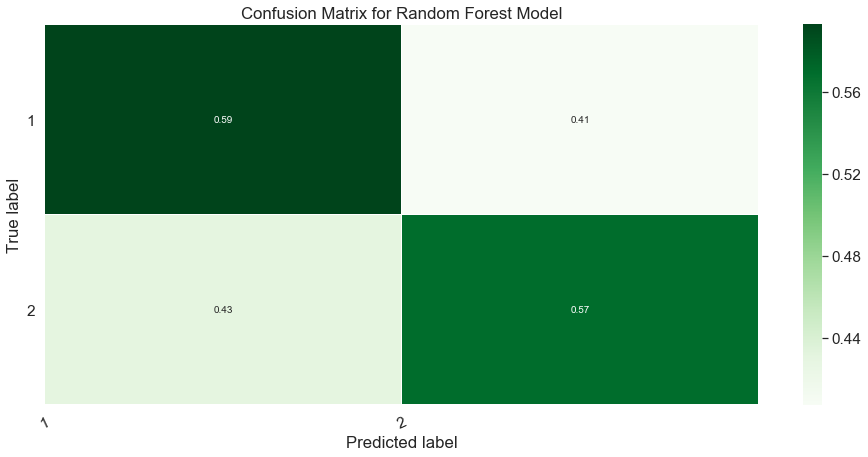

In [20]:
matrix = confusion_matrix(y_test, predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['1', '2']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

### MLP

In [21]:
accuracy, precision, recall = {}, {}, {}

for key in feature_list.keys():
    
    # Define X and y test/ train/ split
    X=data_1_2[feature_list[key]]  # Features  
    y=data_1_2['Severity']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
    # Data needs to be scaled
    scaler = StandardScaler()  
    # Scale only on training data
    scaler.fit(X_train)  
    X_train = scaler.transform(X_train)  
    # apply same transformation to test data
    X_test = scaler.transform(X_test)  
    
    clf=MLPClassifier(random_state=0, early_stopping=True)  #defining classifier method
    clf.fit(X_train,y_train)                   # training classifier 
    
    # Prediction 
    predictions = clf.predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = balanced_accuracy_score(predictions, y_test) 
    precision[key] = precision_score(predictions, y_test, average='weighted')
    recall[key] = recall_score(predictions, y_test, average='weighted')

In [22]:
df_model = pd.DataFrame(index=feature_list.keys())
df_model['Balanced Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Balanced Accuracy,Precision,Recall
All,0.591634,0.593533,0.590864
Wu,0.574599,0.574667,0.574656
Mencar,0.543162,0.548945,0.543222
Ustun,0.565802,0.568502,0.565815
Huang,0.558838,0.560715,0.558939
Rodruiges,0.582022,0.587640,0.581532
Demographic,0.543785,0.552111,0.543713
Measurements,0.551432,0.552964,0.551572
Comorbidities,0.551378,0.584260,0.546169
Symptoms,0.544732,0.549538,0.543713


##### Confusion matrix for model with highest balanced accuracy

In [23]:
X=data_1_2[features]  # Features  
y=data_1_2['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
 # Data needs to be scaled
scaler = StandardScaler()  
    # Scale only on training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
    # apply same transformation to test data
X_test = scaler.transform(X_test)  
    
clf=MLPClassifier(random_state=0, early_stopping=True)  #defining classifier method
clf.fit(X_train,y_train)                   # training classifier 
    
# Prediction 
predictions = clf.predict(X_test)

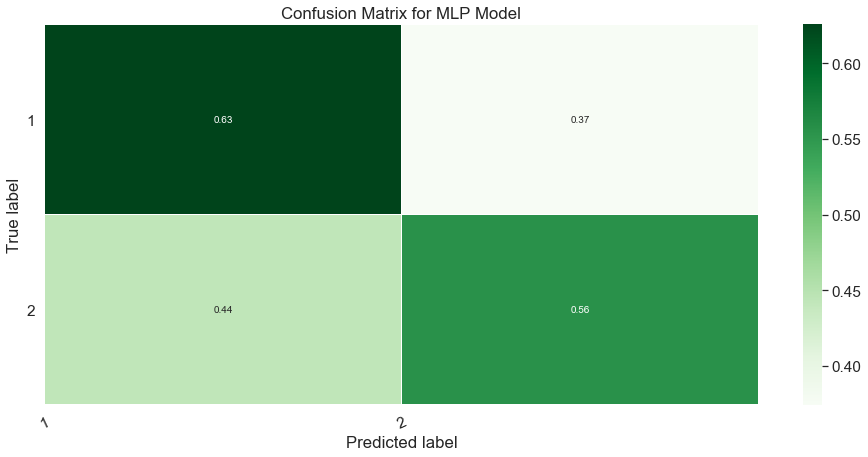

In [24]:
matrix = confusion_matrix(y_test, predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['1', '2']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for MLP Model')
plt.show()

### SVM

In [25]:
accuracy, precision, recall = {}, {}, {}

for key in feature_list.keys():
    
    # Define X and y test/ train/ split
    X=data_1_2[feature_list[key]]  # Features  
    y=data_1_2['Severity']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
    # Data needs to be scaled
    scaler = StandardScaler()  
    # Scale only on training data
    scaler.fit(X_train)  
    X_train = scaler.transform(X_train)  
    # apply same transformation to test data
    X_test = scaler.transform(X_test) 
    
    clf=LinearSVC(class_weight='balanced', random_state = 0, max_iter = 5000)  #defining classifier method
    clf.fit(X_train,y_train)                   # training classifier 
    
    # Prediction 
    predictions = clf.predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = balanced_accuracy_score(predictions, y_test) 
    precision[key] = precision_score(predictions, y_test, average='weighted')
    recall[key] = recall_score(predictions, y_test, average='weighted')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [26]:
df_model = pd.DataFrame(index=feature_list.keys())
df_model['Balanced Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Balanced Accuracy,Precision,Recall
All,0.583611,0.583752,0.583497
Wu,0.571868,0.572112,0.571709
Mencar,0.538735,0.545980,0.538802
Ustun,0.559158,0.559594,0.558939
Huang,0.551327,0.551882,0.551081
Rodruiges,0.563321,0.564548,0.562868
Demographic,0.544443,0.545003,0.544204
Measurements,0.554478,0.555817,0.554028
Comorbidities,0.544957,0.577808,0.540275
Symptoms,0.547834,0.550465,0.547151


##### Confusion matrix for model with highest balanced accuracy

In [27]:
X=data_1_2[features]  # Features  
y=data_1_2['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
 # Data needs to be scaled
scaler = StandardScaler()  
    # Scale only on training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
    # apply same transformation to test data
X_test = scaler.transform(X_test)  

clf=LinearSVC(class_weight='balanced', random_state = 0, max_iter = 10000)  #defining classifier method
clf.fit(X_train,y_train)                   # training classifier 
    
# Prediction 
predictions = clf.predict(X_test)

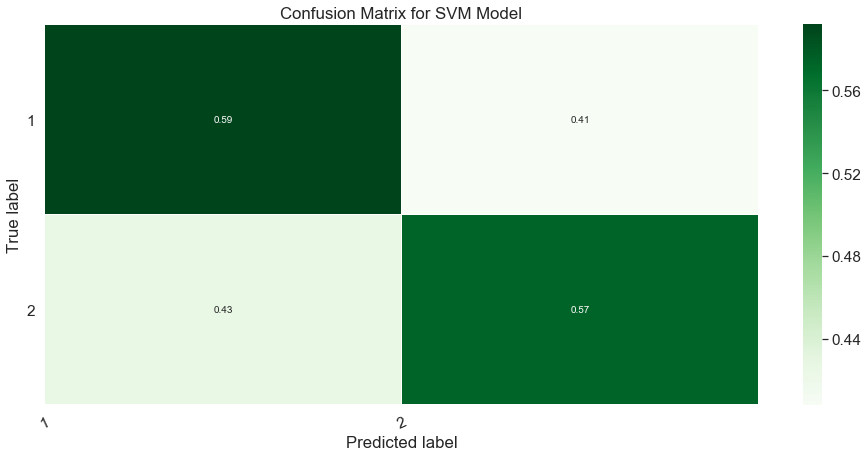

In [28]:
matrix = confusion_matrix(y_test, predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['1', '2']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for SVM Model')
plt.show()

### Naive Bayes

In [29]:
accuracy, precision, recall = {}, {}, {}

for key in feature_list.keys():
    
    # Define X and y test/ train/ split
    X=data_1_2[feature_list[key]]  # Features  
    y=data_1_2['Severity']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
    clf=GaussianNB()  #defining classifier method
    clf.fit(X_train,y_train)                   # training classifier 
    
    # Prediction 
    predictions = clf.predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = balanced_accuracy_score(predictions, y_test) 
    precision[key] = precision_score(predictions, y_test, average='weighted')
    recall[key] = recall_score(predictions, y_test, average='weighted')

In [30]:
df_model = pd.DataFrame(index=feature_list.keys())
df_model['Balanced Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Balanced Accuracy,Precision,Recall
All,0.553191,0.645429,0.539784
Wu,0.568712,0.570651,0.568762
Mencar,0.549714,0.556772,0.549607
Ustun,0.555058,0.564940,0.553045
Huang,0.556306,0.570080,0.555501
Rodruiges,0.568747,0.568757,0.568762
Demographic,0.534079,0.534498,0.533890
Measurements,0.541709,0.541738,0.541749
Comorbidities,0.547714,0.687730,0.529961
Symptoms,0.549720,0.560931,0.547642


##### Confusion matrix for model with highest balanced accuracy

In [37]:
X=data_1_2[rodruiges]  # Features  
y=data_1_2['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
clf=GaussianNB()  #defining classifier method
clf.fit(X_train,y_train)                   # training classifier 
    
# Prediction 
predictions = clf.predict(X_test)

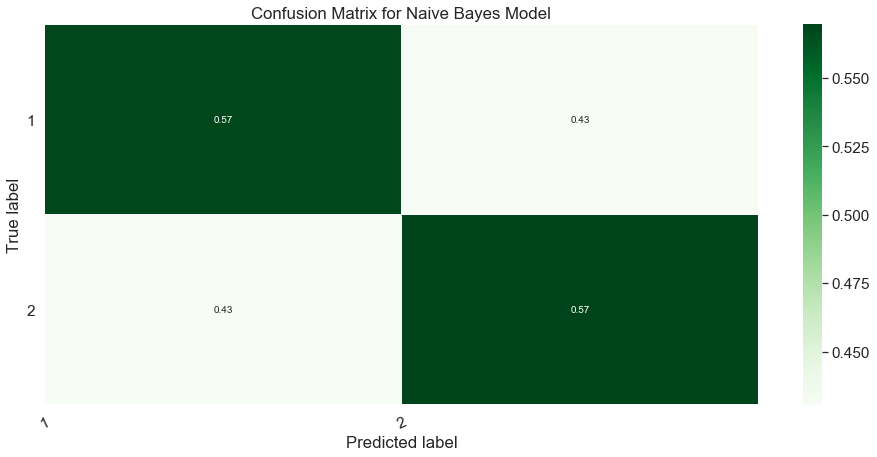

In [38]:
matrix = confusion_matrix(y_test, predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['1', '2']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Naive Bayes Model')
plt.show()

### Logistic Regression

In [33]:
accuracy, precision, recall = {}, {}, {}

for key in feature_list.keys():
    
    # Define X and y test/ train/ split
    X=data_1_2[feature_list[key]]  # Features  
    y=data_1_2['Severity']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
    clf=LogisticRegression(class_weight='balanced', random_state = 0, solver = 'lbfgs', max_iter = 5000)  #defining classifier method
    clf.fit(X_train,y_train)                   # training classifier 
    
    # Prediction 
    predictions = clf.predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = balanced_accuracy_score(predictions, y_test) 
    precision[key] = precision_score(predictions, y_test, average='weighted')
    recall[key] = recall_score(predictions, y_test, average='weighted')

In [34]:
df_model = pd.DataFrame(index=feature_list.keys())
df_model['Balanced Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Balanced Accuracy,Precision,Recall
All,0.585110,0.585298,0.584971
Wu,0.571868,0.572112,0.571709
Mencar,0.538231,0.545372,0.538310
Ustun,0.559141,0.559524,0.558939
Huang,0.550844,0.551431,0.550589
Rodruiges,0.563802,0.564983,0.563360
Demographic,0.543459,0.544020,0.543222
Measurements,0.553561,0.555205,0.553045
Comorbidities,0.544957,0.577808,0.540275
Symptoms,0.548796,0.551290,0.548134


##### Confusion matrix for model with highest balanced accuracy

In [35]:
X=data_1_2[features]  # Features  
y=data_1_2['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
clf=LogisticRegression(class_weight='balanced', random_state = 0, solver = 'lbfgs', max_iter = 5000)  #defining classifier method
clf.fit(X_train,y_train)                   # training classifier 
    
# Prediction 
predictions = clf.predict(X_test)

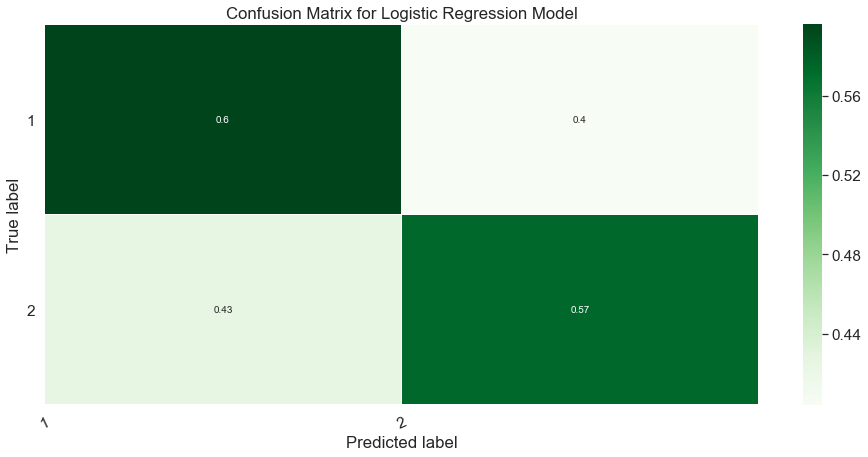

In [36]:
matrix = confusion_matrix(y_test, predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['1', '2']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()